In [86]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten, Dropout, Conv2D, MaxPooling2D, InputLayer, GlobalAveragePooling2D
from numpy.ma.core import shape
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.layers.core import flatten

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Numbers of class

In [16]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images[0].shape

(28, 28)

Text(0.5, 1.0, 'T-shirt/top')

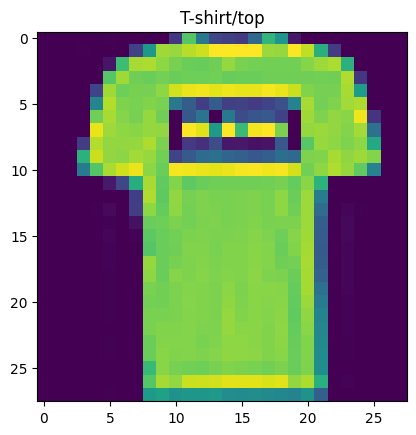

In [20]:
plt.imshow(train_images[1])
plt.title(class_names[train_labels[1]])

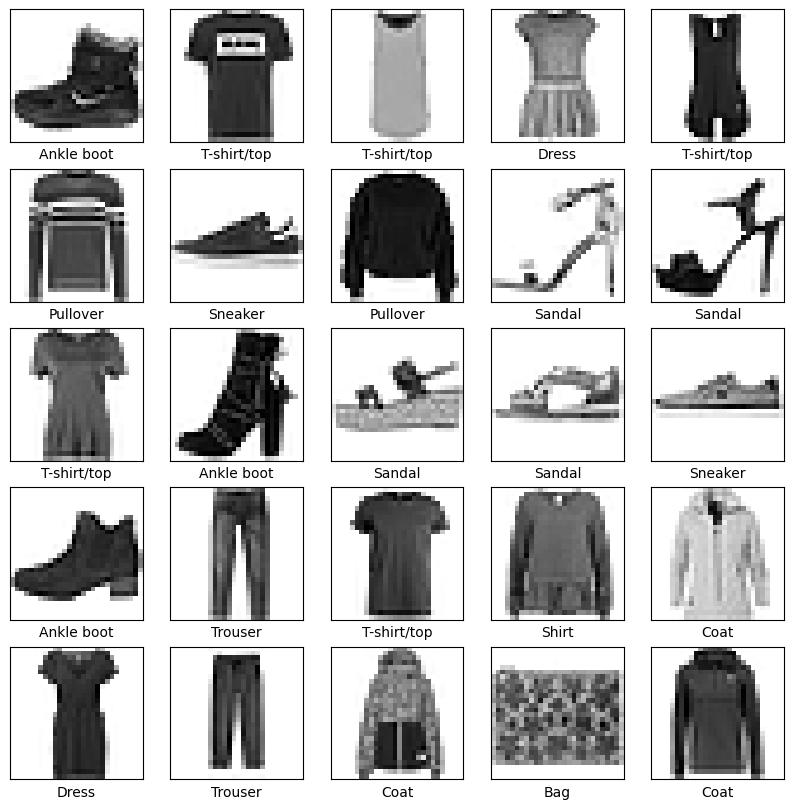

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255

# Dense Nural Network with Dropout

In [68]:
model_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

In [69]:
model_nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model_nn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
history = model_nn.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7657 - loss: 0.6667 - val_accuracy: 0.8405 - val_loss: 0.4411
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8355 - loss: 0.4733 - val_accuracy: 0.8529 - val_loss: 0.4111
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8449 - loss: 0.4374 - val_accuracy: 0.8597 - val_loss: 0.3981
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8541 - loss: 0.4137 - val_accuracy: 0.8638 - val_loss: 0.3835
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3943 - val_accuracy: 0.8629 - val_loss: 0.3797
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8643 - loss: 0.3782 - val_accuracy: 0.8629 - val_loss: 0.3721
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8672 - loss: 0.3705 - val_accuracy: 0.8713 - val_loss: 0.3603
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3585 - 

In [72]:
test_loss, test_acc = model_nn.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {round(test_acc*100)}%')

313/313 - 0s - 1ms/step - accuracy: 0.8861 - loss: 0.3838

Test accuracy: 89%


Test Accuracy: 0.8860999941825867 
Maximum Test Acuracy During Training:  0.8876000046730042


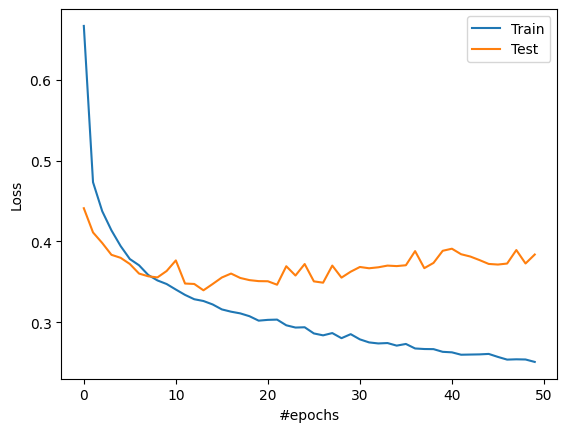

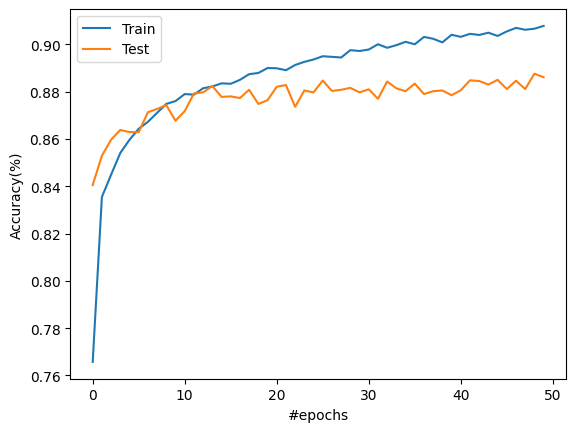

In [73]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

# Convolutional Neural Network Modeling

In [91]:
model_cnn = Sequential([
    InputLayer(input_shape=(28, 28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

model_cnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
history =  model_cnn.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5629 - loss: 1.1475 - val_accuracy: 0.7350 - val_loss: 0.7411
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6976 - loss: 0.8261 - val_accuracy: 0.7605 - val_loss: 0.6542
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7353 - loss: 0.7350 - val_accuracy: 0.7780 - val_loss: 0.6031
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7559 - loss: 0.6815 - val_accuracy: 0.7932 - val_loss: 0.5494
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7693 - loss: 0.6417 - val_accuracy: 0.7957 - val_loss: 0.5331
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7823 - loss: 0.6117 - val_accuracy: 0.8038 - val_loss: 0.5283
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7903 - loss: 0.5876 - val_accuracy: 0.8214 - val_loss: 0.4848
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7973 - loss: 0.5699 -

In [95]:
test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {round(test_acc*100)}%')

313/313 - 1s - 2ms/step - accuracy: 0.8649 - loss: 0.3764

Test accuracy: 86%


Test Accuracy: 0.8648999929428101 
Maximum Test Acuracy During Training:  0.8648999929428101


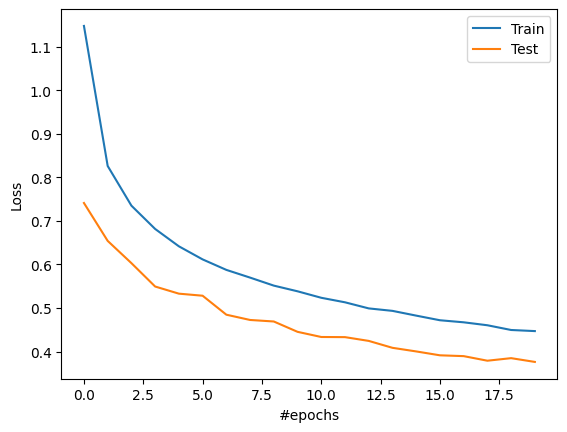

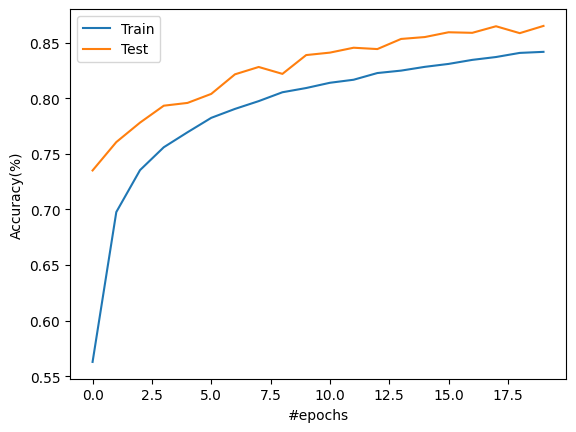

In [96]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()